In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nfx = pd.read_csv('NFLX.csv',parse_dates=["Date"])

In [20]:
import datetime as datetime
from statsmodels.tsa.arima_model import ARIMA
nfx.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticks,Rolling_Mean
0,2019-01-25,328.720001,340.000000,328.510010,338.049988,338.049988,11152900,0,NaN
1,2019-01-28,334.700012,336.299988,328.880005,335.660004,335.660004,8652100,1,NaN
2,2019-01-29,335.869995,338.220001,328.149994,328.899994,328.899994,7655200,2,NaN
3,2019-01-30,332.750000,341.779999,330.799988,340.660004,340.660004,9234500,3,NaN
4,2019-01-31,339.679993,345.989990,338.089996,339.500000,339.500000,8535500,4,NaN
5,2019-02-01,337.179993,346.839996,336.500000,339.850006,339.850006,9827800,5,NaN
6,2019-02-04,342.600006,352.000000,341.299988,351.339996,351.339996,9051400,6,NaN
7,2019-02-05,353.200012,360.000000,352.899994,355.809998,355.809998,9046600,7,NaN
8,2019-02-06,357.000000,357.040009,347.190002,352.190002,352.190002,6717700,8,NaN
9,2019-02-07,347.899994,348.750000,339.019989,344.709991,344.709991,7864500,9,NaN


In [21]:
nfx.head

<bound method NDFrame.head of           Date        Open        High         Low       Close   Adj Close  \
0   2019-01-25  328.720001  340.000000  328.510010  338.049988  338.049988   
1   2019-01-28  334.700012  336.299988  328.880005  335.660004  335.660004   
2   2019-01-29  335.869995  338.220001  328.149994  328.899994  328.899994   
3   2019-01-30  332.750000  341.779999  330.799988  340.660004  340.660004   
4   2019-01-31  339.679993  345.989990  338.089996  339.500000  339.500000   
..         ...         ...         ...         ...         ...         ...   
247 2020-01-17  341.000000  341.570007  337.380005  339.670013  339.670013   
248 2020-01-21  340.000000  341.000000  332.589996  338.109985  338.109985   
249 2020-01-22  332.549988  336.299988  323.600006  326.000000  326.000000   
250 2020-01-23  326.040009  349.880005  325.010010  349.600006  349.600006   
251 2020-01-24  348.459991  359.850006  345.880005  353.160004  353.160004   

       Volume  Ticks  Rolling_Mea

In [24]:
from sklearn.linear_model import LinearRegression

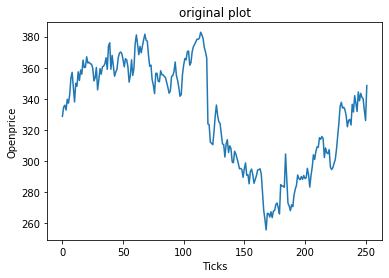

In [25]:
nfx['Ticks'] = range(0,len(nfx.index.values))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Openprice')
ax1.set_title('original plot')
ax1.plot('Ticks','Open', data = nfx );

In [26]:
nfx['Rolling_Mean'] = nfx['Open'].rolling(window = 80).mean()
nfx.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticks,Rolling_Mean
0,2019-01-25,328.720001,340.000000,328.510010,338.049988,338.049988,11152900,0,NaN
1,2019-01-28,334.700012,336.299988,328.880005,335.660004,335.660004,8652100,1,NaN
2,2019-01-29,335.869995,338.220001,328.149994,328.899994,328.899994,7655200,2,NaN
3,2019-01-30,332.750000,341.779999,330.799988,340.660004,340.660004,9234500,3,NaN
4,2019-01-31,339.679993,345.989990,338.089996,339.500000,339.500000,8535500,4,NaN
5,2019-02-01,337.179993,346.839996,336.500000,339.850006,339.850006,9827800,5,NaN
6,2019-02-04,342.600006,352.000000,341.299988,351.339996,351.339996,9051400,6,NaN
7,2019-02-05,353.200012,360.000000,352.899994,355.809998,355.809998,9046600,7,NaN
8,2019-02-06,357.000000,357.040009,347.190002,352.190002,352.190002,6717700,8,NaN
9,2019-02-07,347.899994,348.750000,339.019989,344.709991,344.709991,7864500,9,NaN


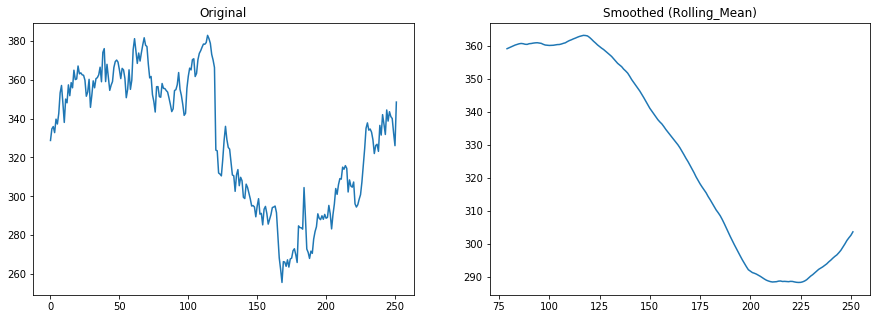

In [27]:
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (15,5));
axes[0].plot('Ticks','Open', data= nfx);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Rolling_Mean', data = nfx);
axes[1].set_title('Smoothed (Rolling_Mean)');

In [28]:
X = nfx['Ticks']
Y = nfx['Open']
X.shape
Y.shape
X_matrix = X.values.reshape(-1, 1)
Y_matrix = Y.values.reshape(-1, 1)


In [29]:
reg = LinearRegression()
reg.fit(X_matrix,Y_matrix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
reg.score(X_matrix, Y_matrix)

0.41717988741711254

In [31]:
reg.coef_

array([[-0.3022505]])

In [32]:
reg.intercept_

array([367.56073185])

TypeError: predict() takes 2 positional arguments but 3 were given

In [ ]:
nfx.size

In [ ]:
train = Y[0:50]
test = Y[50:75]
predictions = []
train

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


In [ ]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=50,end=75)

In [ ]:
plt.plot(test)
plt.plot(predictions, color= 'red')